# **Best book Selling by Amazon**

### Group Members:
---
*   Shafaq Hussain [FA22-MSCS-0036]
*   Uzma Raza [FA22-MSCS-0026]
*   Fatima Zahra [SP22-MSBI-0001]
---


# Business Goals

The business goals of our project is to understand what makes books sell well on Amazon. We'll look at factors like language, genre, series, and authorship. The project wants to find patterns, identify traits of top-selling books, and predict the likelihood of a book becoming a best-seller. We'll also figure out which genres attract more readers and provide tips for new authors. Using a dataset of the top 100 books on Amazon, we'll analyze the data to help publishers and authors make better decisions.


# Objective
 The goal of our project is to analyze a dataset of top-selling books on Amazon. We aim to uncover insights into factors influencing sales, predict best-sellers, and provide actionable recommendations for authors and publishers. Through this project, we hope to gain practical experience in applying data science techniques to real-world business questions.

# **Business Questions:**
Q1. What are the approximate sales of books according to language, genre, Author?

Q2. What do the top selling books(like top 10)have in common?

Q3. What is the likelihood of a book becoming the best-seller based on author, genre, price etc?

Q4. What genre (fiction,non-fiction) is attractive for the readers, i.e generates more sales ?

Q5. What new authors can do to break though, like what genre to hit or the price to pursue etc?


# OUR APPORACH
We follow the data science pipeline apporach, i.e if at any point we failed or got stuck we would revert beack to the previous steps and then move up the pipeline as a data scientist should.

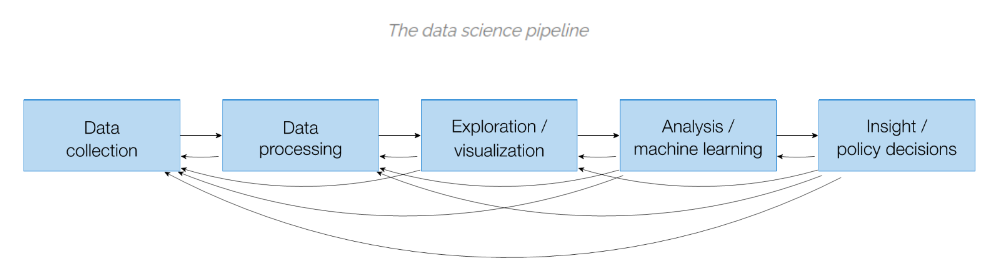
*[fig taken from sir's notes]*

The other apporach we chose was to work on the dataset provided / chosen and extract/ gain meaning ful insights from it.

# **Data Pre-Processing**
## Gathering

**Previously gatherred data source** : https://www.kaggle.com/datasets/drahulsingh/best-selling-books

previous project working file : https://colab.research.google.com/drive/1lIw7Oihhwqzj-s3yT1A_O3HQDbBsVm0e


Data Sources is from Kaggle called; **TOP 100 BEST SELLING BOOKS ON AMAZON 2009-2021**

Data link: https://www.kaggle.com/datasets/abdulhamidadavize/top-100-best-selling-books-on-amazon-20092021




### Downloading and loading the nescessary libraries

In [ ]:
!pip install -U scikit-learn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **1.importing the required libraries for EDA**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, f1_score, recall_score, classification_report,confusion_matrix



# **2.Loading the Data into the Data Frame**

In [ ]:
# load dataset from github link

# url = "https://raw.githubusercontent.com/fenago/datasets/main/winequalityN.csv"
# wine_quality_df = pd.read_csv(url, sep=",")

df = pd.read_csv('/content/drive/MyDrive/Data Science Project/Amazon_top100_bestselling_books_2009to2021.csv')

df.head(5)
# wine_quality_df.head()


,Unnamed: 0,price,ranks,title,no_of_reviews,ratings,author,cover_type,year,genre
0,0,12.49,1.0,The Lost Symbol,"16,118",4.4,Dan Brown,Hardcover,2009,Fiction
1,1,13.40,2.0,The Shack: Where Tragedy Confronts Eternity,"23,392",4.7,William P. Young,Paperback,2009,Fiction
2,2,9.93,3.0,Liberty and Tyranny: A Conservative Manifesto,"5,036",4.8,Mark R. Levin,Hardcover,2009,Non Fiction
3,3,14.30,4.0,"Breaking Dawn (The Twilight Saga, Book 4)","16,912",4.7,Stephenie Meyer,Hardcover,2009,Fiction
4,4,9.99,5.0,Going Rogue: An American Life,"1,572",4.6,Sarah Palin,Hardcover,2009,Non Fiction


## **Data Cleaning**

In [ ]:
# top 5 rows of dataset
df.describe()

,Unnamed: 0,price,ranks,ratings,year
count,1291.000000,1287.000000,1287.000000,1287.000000,1291.000000
mean,645.000000,13.757117,50.246309,4.650894,2015.027111
std,372.823908,10.046391,28.803308,0.197174,3.734404
min,0.000000,1.170000,1.000000,3.400000,2009.000000
25%,322.500000,8.550000,25.000000,4.600000,2012.000000
50%,645.000000,12.100000,50.000000,4.700000,2015.000000
75%,967.500000,16.290000,75.000000,4.800000,2018.000000
max,1290.000000,144.000000,100.000000,4.900000,2021.000000


In [ ]:
#display bottom 5 rows
df.tail(5)


,Unnamed: 0,price,ranks,title,no_of_reviews,ratings,author,cover_type,year,genre
1286,1286,16.69,96.0,Will,"21,401",4.8,Will Smith,Hardcover,2021,Non Fiction
1287,1287,7.49,97.0,Think and Grow Rich: The Landmark Bestseller N...,"79,872",4.7,Napoleon Hill,Paperback,2021,Non Fiction
1288,1288,8.95,98.0,Dragons Love Tacos,"15,753",4.8,Adam Rubin,Hardcover,2021,Fiction
1289,1289,7.59,99.0,The Truth About COVID-19: Exposing The Great R...,"7,246",4.8,Doctor Joseph Mercola,Hardcover,2021,Non Fiction
1290,1290,13.29,100.0,First Little Readers Parent Pack: Guided Readi...,"27,332",4.7,Deborah Schecter,Paperback,2021,Non Fiction


# **3.Checking the type of data**


In [ ]:
df.dtypes

Unnamed: 0         int64
price            float64
ranks            float64
title             object
no_of_reviews     object
ratings          float64
author            object
cover_type        object
year               int64
genre             object
dtype: object

In [ ]:
# showing statistical descrption of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1291 entries, 0 to 1290
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1291 non-null   int64  
 1   price          1287 non-null   float64
 2   ranks          1287 non-null   float64
 3   title          1286 non-null   object 
 4   no_of_reviews  1287 non-null   object 
 5   ratings        1287 non-null   float64
 6   author         1286 non-null   object 
 7   cover_type     1286 non-null   object 
 8   year           1291 non-null   int64  
 9   genre          1288 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 101.0+ KB


# **4.Dropping irrelevent columns**

In [ ]:
# drop irrelevant columns

df = df.drop(['cover_type'], axis = 1)


In [ ]:
df.head(5)

,Unnamed: 0,price,ranks,title,no_of_reviews,ratings,author,year,genre
0,0,12.49,1.0,The Lost Symbol,"16,118",4.4,Dan Brown,2009,Fiction
1,1,13.40,2.0,The Shack: Where Tragedy Confronts Eternity,"23,392",4.7,William P. Young,2009,Fiction
2,2,9.93,3.0,Liberty and Tyranny: A Conservative Manifesto,"5,036",4.8,Mark R. Levin,2009,Non Fiction
3,3,14.30,4.0,"Breaking Dawn (The Twilight Saga, Book 4)","16,912",4.7,Stephenie Meyer,2009,Fiction
4,4,9.99,5.0,Going Rogue: An American Life,"1,572",4.6,Sarah Palin,2009,Non Fiction


## **5.Renaming the columns**

In [ ]:
# renaming the columns

df.columns

Index(['Unnamed: 0', 'price', 'ranks', 'title', 'no_of_reviews', 'ratings',
       'author', 'year', 'genre'],
      dtype='object')

In [ ]:
df.rename (columns = {'no_of_reviews':'reviews'}, inplace = True)

In [ ]:
df.columns

Index(['Unnamed: 0', 'price', 'ranks', 'title', 'reviews', 'ratings', 'author',
       'year', 'genre'],
      dtype='object')

# **6. Dropping the Duplicate Rows**

In [ ]:
df.shape

(1291, 9)

In [ ]:
# finding out the duplicate rows

duplicate_rows =df[df.duplicated()]

print("number of duplicated rows", duplicate_rows.shape)

number of duplicated rows (0, 9)


In [ ]:
# count the number of rows
df.count()

Unnamed: 0    1291
price         1287
ranks         1287
title         1286
reviews       1287
ratings       1287
author        1286
year          1291
genre         1288
dtype: int64

In [ ]:
df = df.drop_duplicates() #remove the duplicates
df.head(5)

,Unnamed: 0,price,ranks,title,reviews,ratings,author,year,genre
0,0,12.49,1.0,The Lost Symbol,"16,118",4.4,Dan Brown,2009,Fiction
1,1,13.40,2.0,The Shack: Where Tragedy Confronts Eternity,"23,392",4.7,William P. Young,2009,Fiction
2,2,9.93,3.0,Liberty and Tyranny: A Conservative Manifesto,"5,036",4.8,Mark R. Levin,2009,Non Fiction
3,3,14.30,4.0,"Breaking Dawn (The Twilight Saga, Book 4)","16,912",4.7,Stephenie Meyer,2009,Fiction
4,4,9.99,5.0,Going Rogue: An American Life,"1,572",4.6,Sarah Palin,2009,Non Fiction


In [ ]:
df.count()

Unnamed: 0    1291
price         1287
ranks         1287
title         1286
reviews       1287
ratings       1287
author        1286
year          1291
genre         1288
dtype: int64

# **7.Dropping the Missing or Null values**

In [ ]:
print(df.isnull().sum()) #print the sum of null values in each column

Unnamed: 0    0
price         4
ranks         4
title         5
reviews       4
ratings       4
author        5
year          0
genre         3
dtype: int64


In [ ]:
df=df.dropna() #remove the null values

In [ ]:
print(df.isnull().sum())  #print the sum of null values in each column

Unnamed: 0    0
price         0
ranks         0
title         0
reviews       0
ratings       0
author        0
year          0
genre         0
dtype: int64


In [ ]:
df.count()

Unnamed: 0    1285
price         1285
ranks         1285
title         1285
reviews       1285
ratings       1285
author        1285
year          1285
genre         1285
dtype: int64

In [ ]:
df.columns

Index(['Unnamed: 0', 'price', 'ranks', 'title', 'reviews', 'ratings', 'author',
       'year', 'genre'],
      dtype='object')

In [ ]:
df.columns

Index(['Unnamed: 0', 'price', 'ranks', 'title', 'reviews', 'ratings', 'author',
       'year', 'genre'],
      dtype='object')

## Type Conversion

In [ ]:
# one hot encodding to of title reviews and author

# by using dummy variable

# dummy_df = pd.get_dummies(df)
# dummy_df

In [ ]:
df['title'] = df['title'].astype('object')
df['author'] = df['author'].astype('object')


In [ ]:
df

,Unnamed: 0,price,ranks,title,reviews,ratings,author,year,genre
0,0,12.49,1.0,The Lost Symbol,"16,118",4.4,Dan Brown,2009,Fiction
1,1,13.40,2.0,The Shack: Where Tragedy Confronts Eternity,"23,392",4.7,William P. Young,2009,Fiction
2,2,9.93,3.0,Liberty and Tyranny: A Conservative Manifesto,"5,036",4.8,Mark R. Levin,2009,Non Fiction
3,3,14.30,4.0,"Breaking Dawn (The Twilight Saga, Book 4)","16,912",4.7,Stephenie Meyer,2009,Fiction
4,4,9.99,5.0,Going Rogue: An American Life,"1,572",4.6,Sarah Palin,2009,Non Fiction
...,...,...,...,...,...,...,...,...,...
1286,1286,16.69,96.0,Will,"21,401",4.8,Will Smith,2021,Non Fiction
1287,1287,7.49,97.0,Think and Grow Rich: The Landmark Bestseller N...,"79,872",4.7,Napoleon Hill,2021,Non Fiction
1288,1288,8.95,98.0,Dragons Love Tacos,"15,753",4.8,Adam Rubin,2021,Fiction
1289,1289,7.59,99.0,The Truth About COVID-19: Exposing The Great R...,"7,246",4.8,Doctor Joseph Mercola,2021,Non Fiction


In [ ]:

# dummy_df = pd.get_dummies(x)

In [ ]:
# dummy_df

In [ ]:
# pd.get_dummies(x, drop_first=True)

In [ ]:
# one hot encoding with sklearn

# from sklearn.preprocessing import OneHotEncoder
# import numpy as np

In [ ]:
# oh_enc =OneHotEncoder(sparse=False)


In [ ]:
# x.keys()

In [ ]:
# oh_enc_arr =oh_enc.fit_transform(x[['reviews','genre']])
# oh_enc_arr

In [ ]:
# oh_enc_df = pd.DataFrame(oh_enc_arr, columns = ['reviews', 'genre'])

# oh_enc_df

In [ ]:
# x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

# **Exploratory Data Analysis**

        Unnamed: 0        price        ranks      ratings         year
count  1291.000000  1287.000000  1287.000000  1287.000000  1291.000000
mean    645.000000    13.757117    50.246309     4.650894  2015.027111
std     372.823908    10.046391    28.803308     0.197174     3.734404
min       0.000000     1.170000     1.000000     3.400000  2009.000000
25%     322.500000     8.550000    25.000000     4.600000  2012.000000
50%     645.000000    12.100000    50.000000     4.700000  2015.000000
75%     967.500000    16.290000    75.000000     4.800000  2018.000000
max    1290.000000   144.000000   100.000000     4.900000  2021.000000


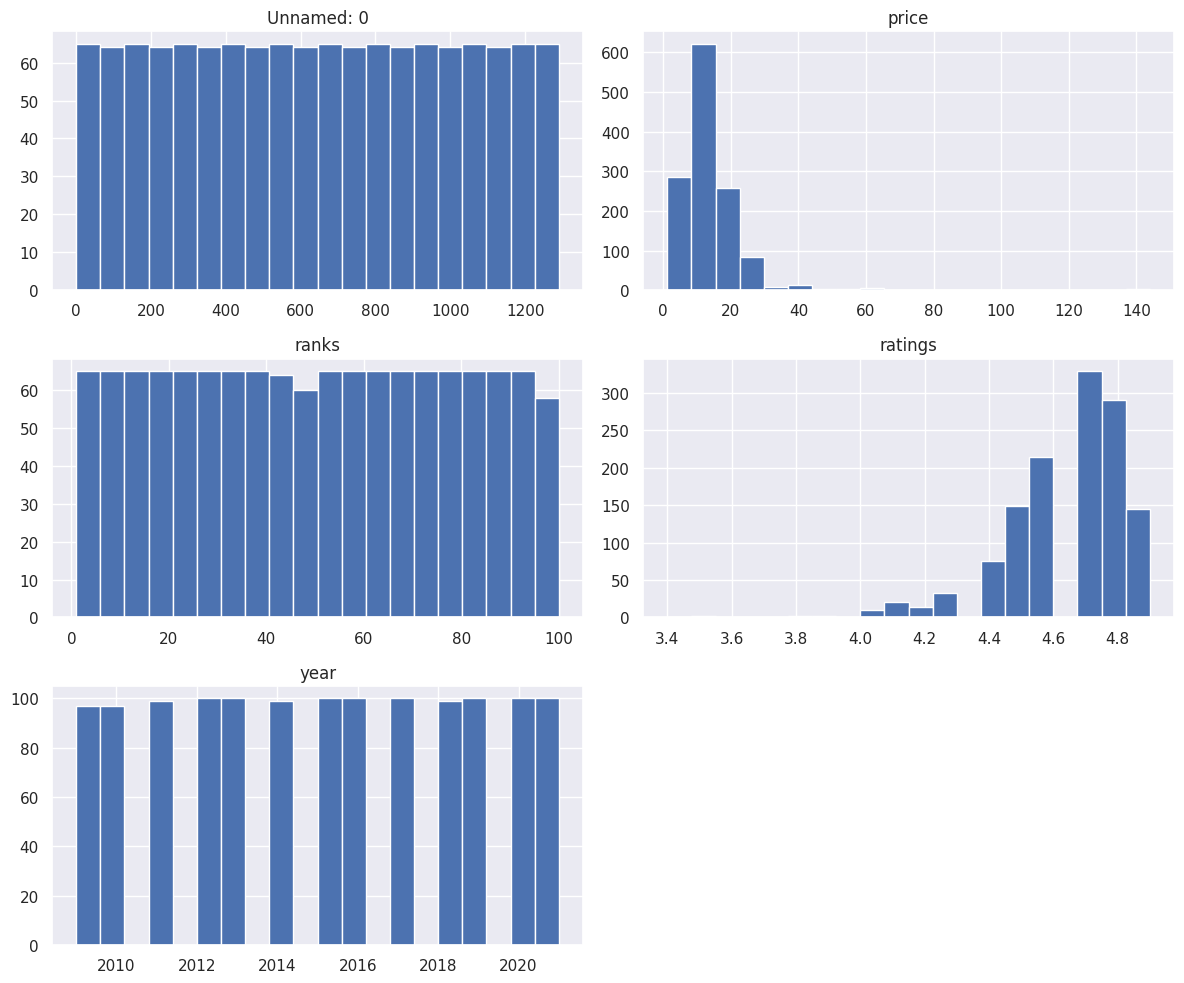

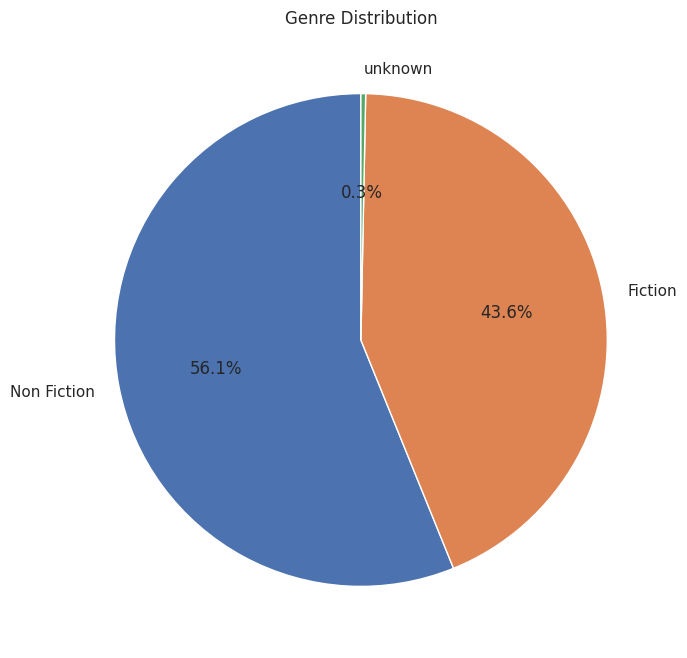

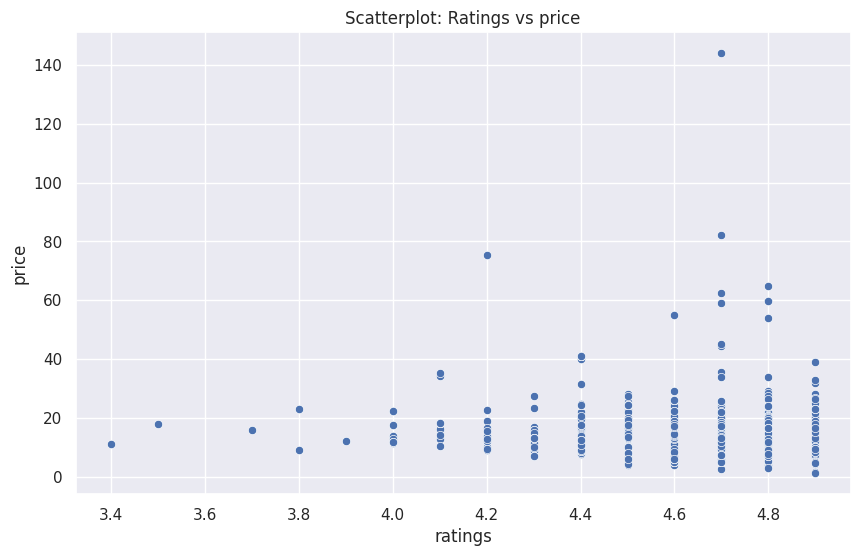

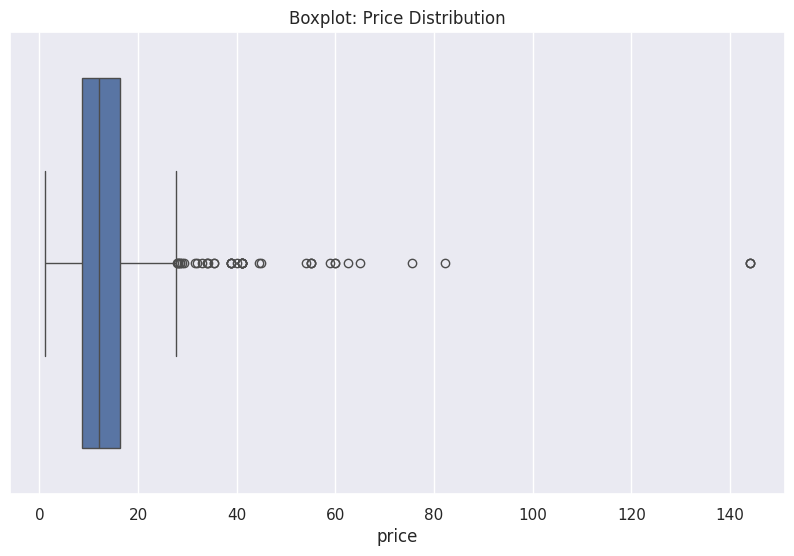

In [ ]:
# For EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Data Science Project/Amazon_top100_bestselling_books_2009to2021.csv')

# Data Cleaning and Preprocessing
# Assuming 'price' and 'ratings' are numeric, handle missing values
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['ratings'] = pd.to_numeric(df['ratings'], errors='coerce')

# Explore basic statistics
print(df.describe())

# Histograms
df.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.title('reviews')
plt.show()  # reviews, author

# Pie Chart for Genre Distribution
genre_distribution = df['genre'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(genre_distribution, labels=genre_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Genre Distribution')
plt.show()



# Scatterplot for Ratings vs Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ratings', y='price', data=df)
plt.title('Scatterplot: Ratings vs price')
plt.xlabel('ratings')
plt.ylabel('price')
plt.show()

# Boxplot for Price Distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='price', data=df)
plt.title('Boxplot: Price Distribution')
plt.show()


### BoxPlots

# **8.Detecting outliers**

<Axes: xlabel='price'>

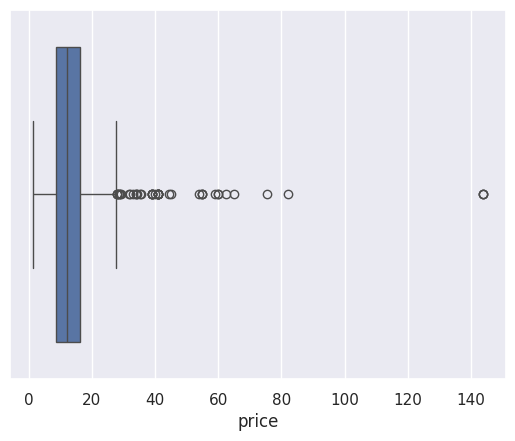

In [ ]:
# Detecting the outliers


sns.boxplot(x=df['price'])

<Axes: xlabel='ratings'>

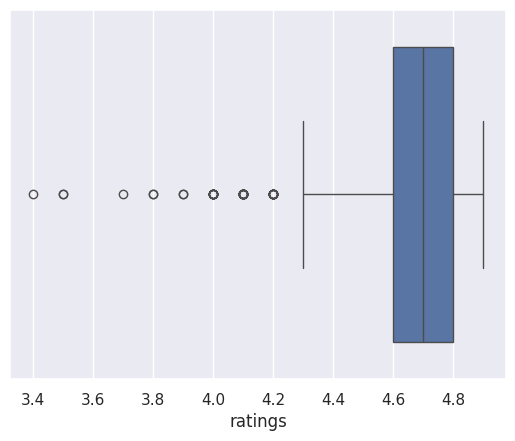

In [ ]:
sns.boxplot(x=df['ratings'])

<Axes: xlabel='ranks'>

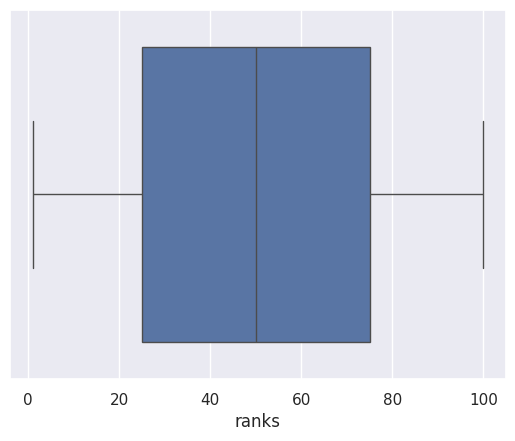

In [ ]:
sns.boxplot(x=df['ranks'])


<Axes: xlabel='year'>

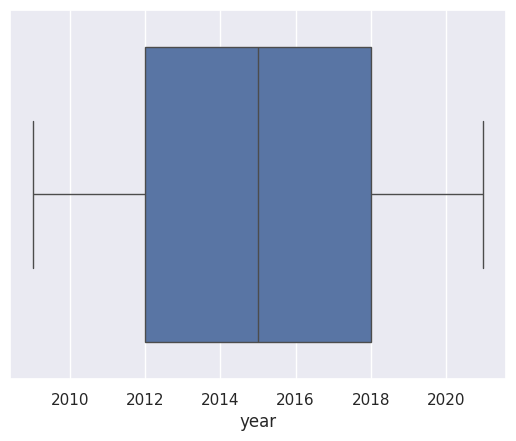

In [ ]:
sns.boxplot(x=df['year'])


### Histograms

# **9.Plot different features against one another (scatter), against frequency (histogram)**

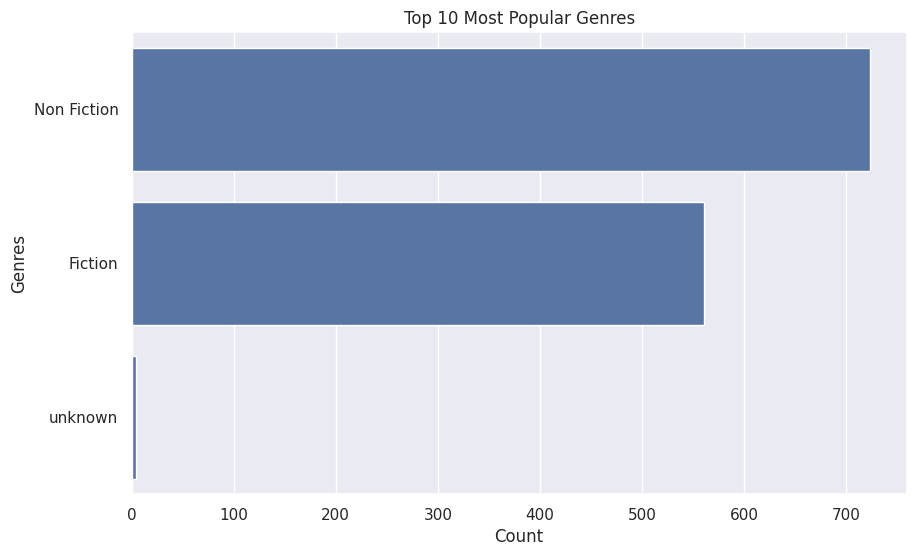

In [ ]:
#  Most popular genres
plt.figure(figsize=(10, 6))
genres_counts = df["genre"].value_counts().head(10)
sns.barplot(x=genres_counts.values, y=genres_counts.index)
plt.xlabel("Count")
plt.ylabel("Genres")
plt.title("Top 10 Most Popular Genres")
plt.show()

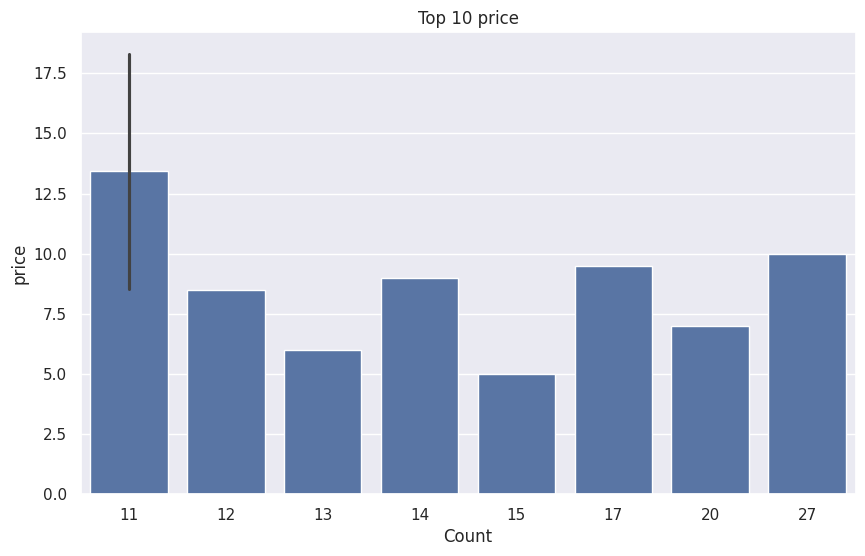

In [ ]:
#  Most popular reviews
plt.figure(figsize=(10, 6))
price_counts = df["price"].value_counts().head(10)
sns.barplot(x=price_counts.values, y=price_counts.index)
plt.xlabel("Count")
plt.ylabel("price")
plt.title("Top 10 price")
plt.show()

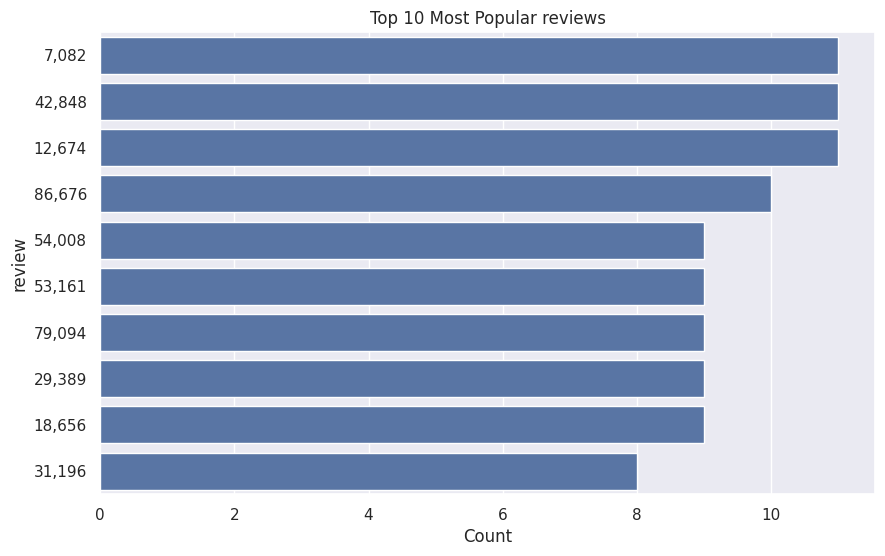

In [ ]:
#  Most popular reviews
plt.figure(figsize=(10, 6))
#review_counts = df["reviews"].value_counts().head(10)
sns.barplot(x=review_counts.values, y=review_counts.index)
plt.xlabel("Count")
plt.ylabel("review")
plt.title("Top 10 Most Popular reviews")
plt.show()

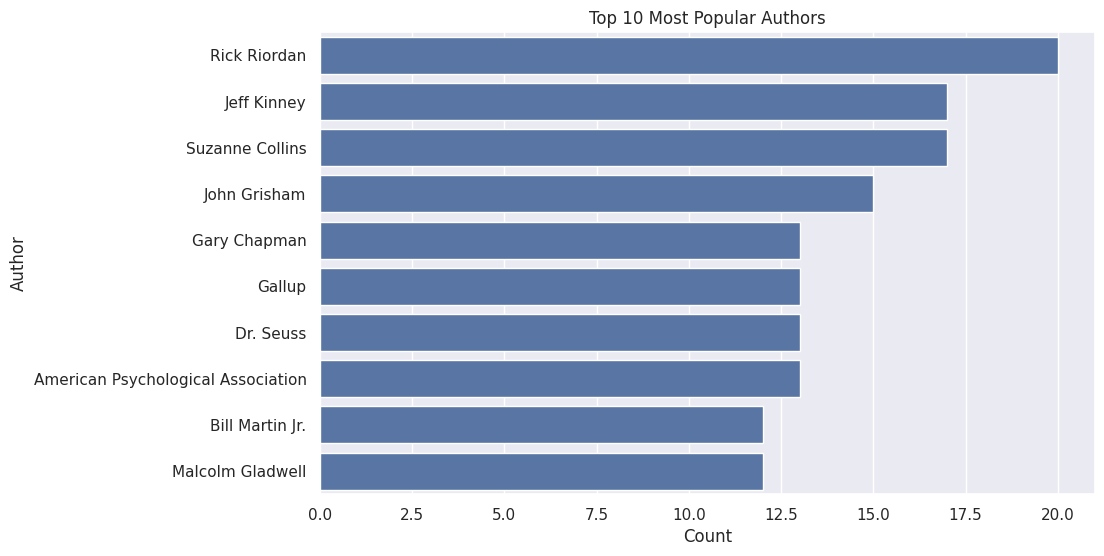

In [ ]:
# Most popular authors
plt.figure(figsize=(10, 6))
author_counts = df["author"].value_counts().head(10)
sns.barplot(x=author_counts.values, y=author_counts.index)
plt.xlabel("Count")
plt.ylabel("Author")
plt.title("Top 10 Most Popular Authors")
plt.show()

### Pie Charts

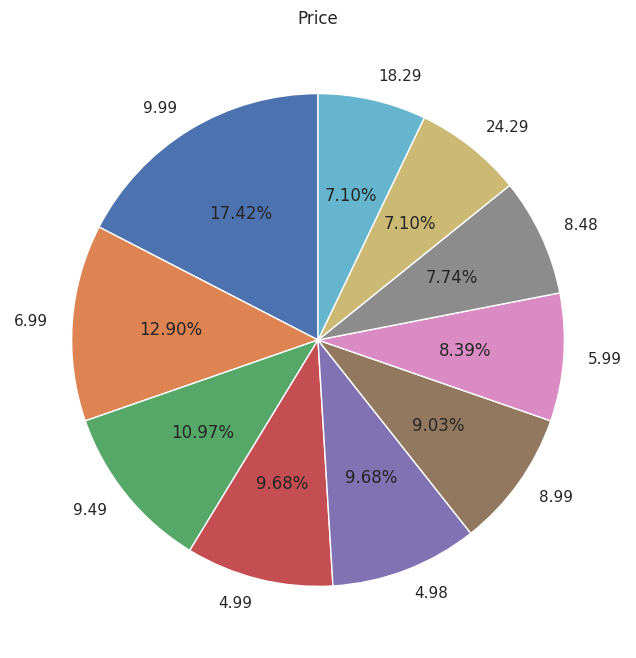

In [ ]:
# Pie Chart for top 10 prices Distribution
price = df["price"].value_counts().head(10)
plt.figure(figsize=(10, 8))
plt.pie(price, labels=price.index, autopct='%2.2f%%', startangle=90)
plt.title('Price')
plt.show()



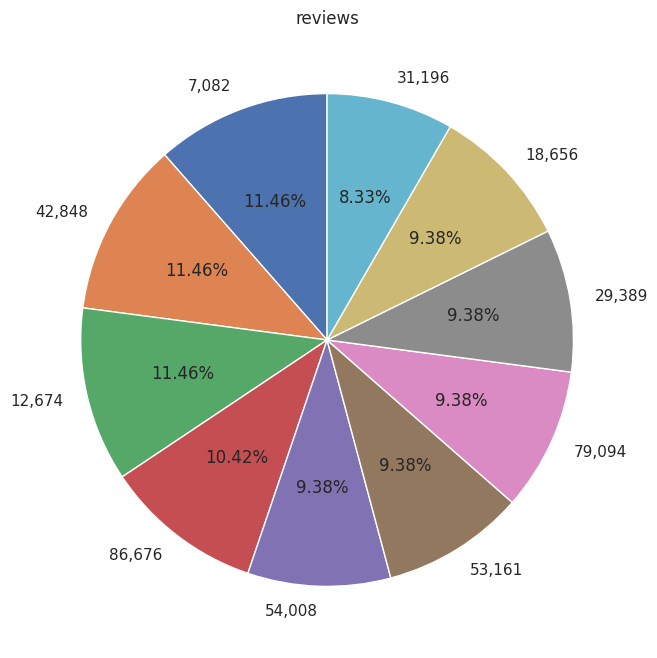

In [ ]:
# Pie Chart for top 10 reviwes Distribution
reviews = df["reviews"].value_counts().head(10)
plt.figure(figsize=(10, 8))
plt.pie(reviews, labels=reviews.index, autopct='%2.2f%%', startangle=90)
plt.title('reviews')
plt.show()

# pie chart author, price, reviews, year, ranks,

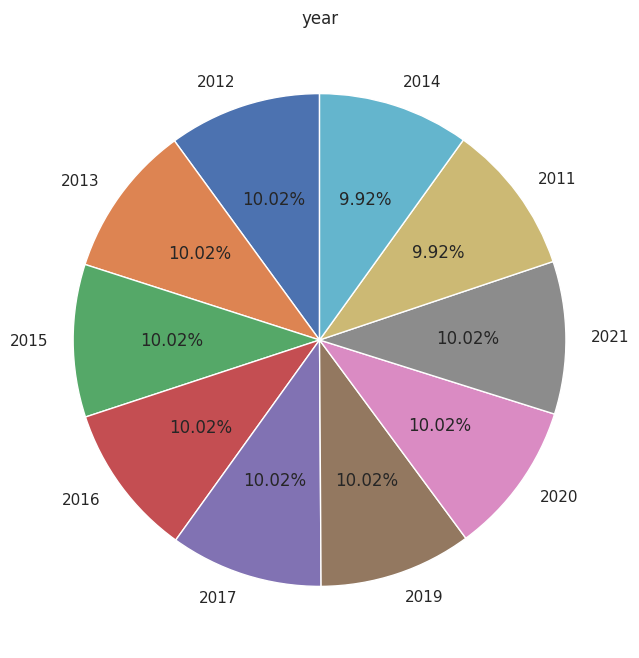

In [ ]:
# Pie Chart for top 10 prices Distribution
year = df["year"].value_counts().head(10)
plt.figure(figsize=(10, 8))
plt.pie(year, labels=year.index, autopct='%2.2f%%', startangle=90)
plt.title('year')
plt.show()

# pie chart author, price, reviews, year, ranks,

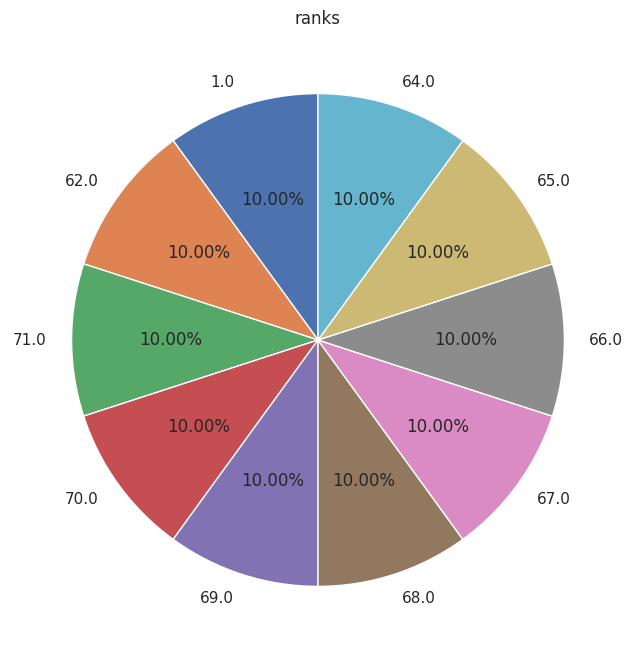

In [ ]:
# Pie Chart for top 10 ranks
ranks = df["ranks"].value_counts().head(10)
plt.figure(figsize=(10, 8))
plt.pie(ranks, labels=ranks.index, autopct='%2.2f%%', startangle=90)
plt.title('ranks')
plt.show()

# pie chart author, price, reviews, year, ranks,

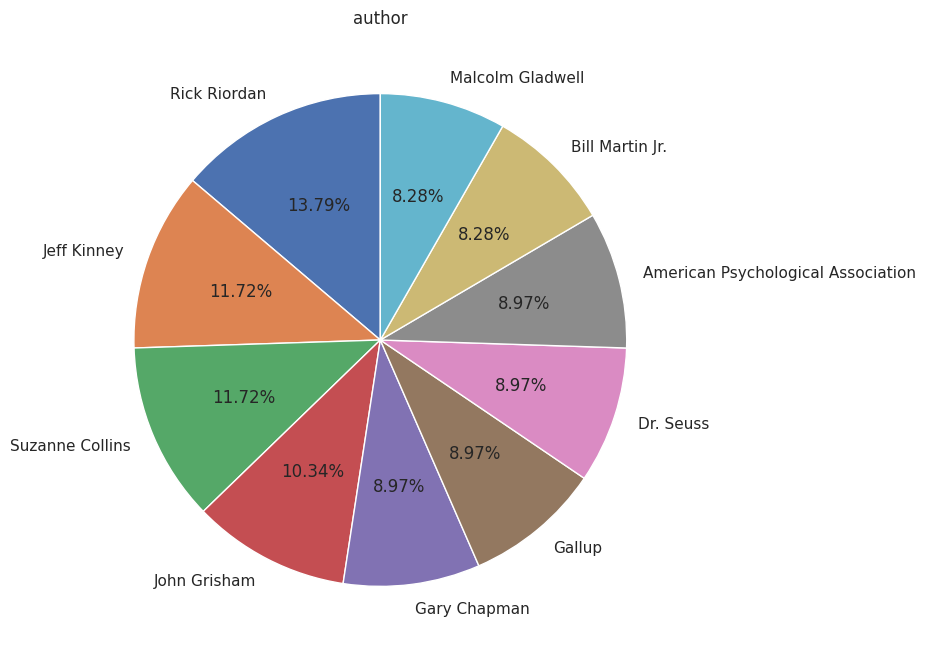

In [ ]:
# Pie Chart for top 10 ranks
author = df["author"].value_counts().head(10)
plt.figure(figsize=(10, 8))
plt.pie(author, labels=author.index, autopct='%2.2f%%', startangle=90)
plt.title('author')
plt.show()

# pie chart author, price, reviews, year, ranks,

### Scatter Plots

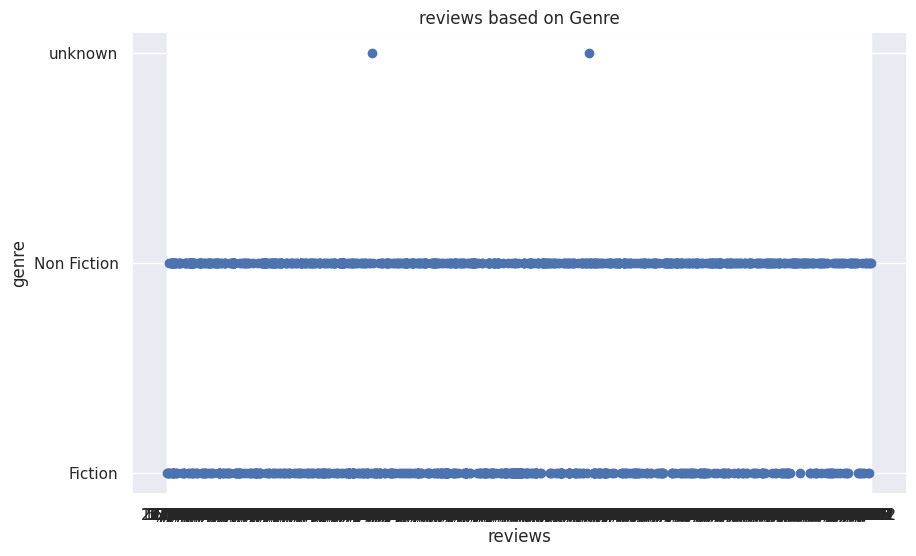

In [ ]:
# create a scatterplot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['reviews'], df['genre'])
ax.set_xlabel('reviews')
ax.set_ylabel('genre')
plt.title('reviews based on Genre')
plt.show()

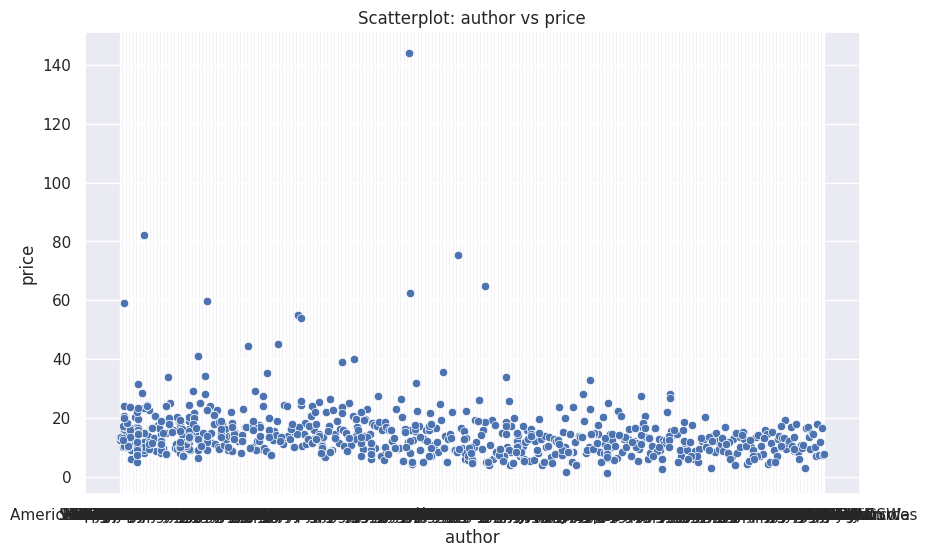

In [ ]:
# Scatterplot for ranks vs reviews
plt.figure(figsize=(10, 6))
sns.scatterplot(x='author', y='price', data=df)
plt.title('Scatterplot: author vs price')
plt.xlabel('author')
plt.ylabel('price')
plt.show()

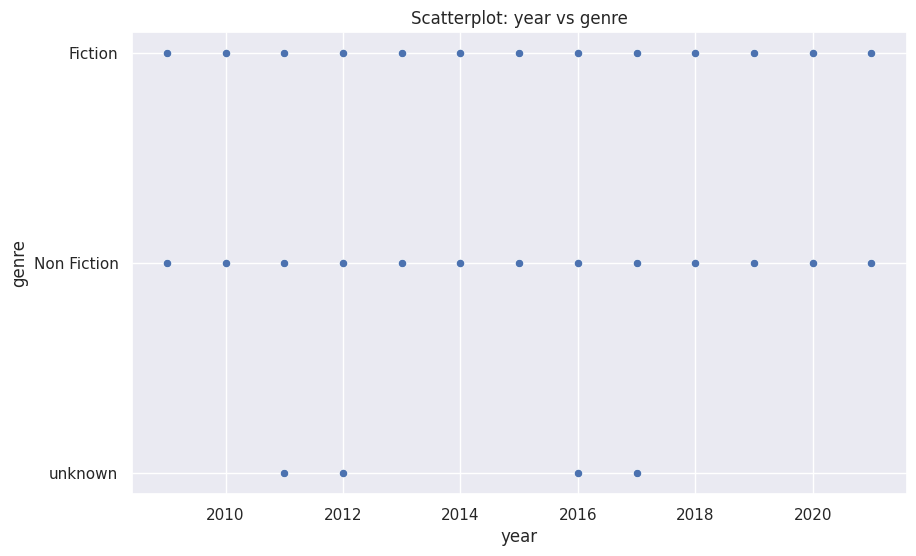

In [ ]:
# Scatterplot for ranks vs reviews
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='genre', data=df)
plt.title('Scatterplot: year vs genre')
plt.xlabel('year')
plt.ylabel('genre')
plt.show()

# Model Prepration, Evaluation and Execution
We have scussfully trained and implemented Linear Regresion and Support Vector Machine for Regression (SVR) for our datset along with categorical convertion for our string features as well

In [ ]:
df

,Unnamed: 0,price,ranks,title,no_of_reviews,ratings,author,cover_type,year,genre
0,0,12.49,1.0,The Lost Symbol,"16,118",4.4,Dan Brown,Hardcover,2009,Fiction
1,1,13.40,2.0,The Shack: Where Tragedy Confronts Eternity,"23,392",4.7,William P. Young,Paperback,2009,Fiction
2,2,9.93,3.0,Liberty and Tyranny: A Conservative Manifesto,"5,036",4.8,Mark R. Levin,Hardcover,2009,Non Fiction
3,3,14.30,4.0,"Breaking Dawn (The Twilight Saga, Book 4)","16,912",4.7,Stephenie Meyer,Hardcover,2009,Fiction
4,4,9.99,5.0,Going Rogue: An American Life,"1,572",4.6,Sarah Palin,Hardcover,2009,Non Fiction
...,...,...,...,...,...,...,...,...,...,...
1286,1286,16.69,96.0,Will,"21,401",4.8,Will Smith,Hardcover,2021,Non Fiction
1287,1287,7.49,97.0,Think and Grow Rich: The Landmark Bestseller N...,"79,872",4.7,Napoleon Hill,Paperback,2021,Non Fiction
1288,1288,8.95,98.0,Dragons Love Tacos,"15,753",4.8,Adam Rubin,Hardcover,2021,Fiction
1289,1289,7.59,99.0,The Truth About COVID-19: Exposing The Great R...,"7,246",4.8,Doctor Joseph Mercola,Hardcover,2021,Non Fiction


Mean Squared Error: 0.020891231943362686


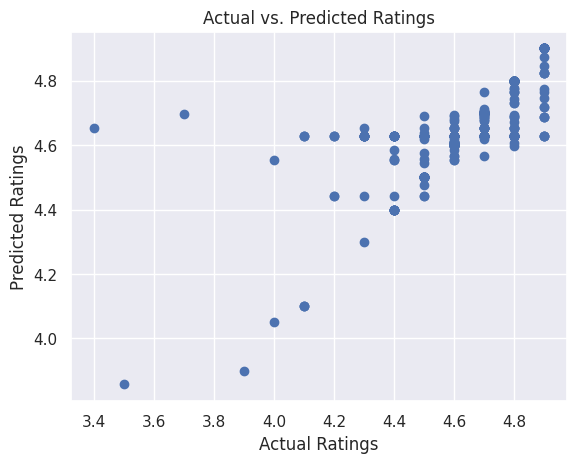

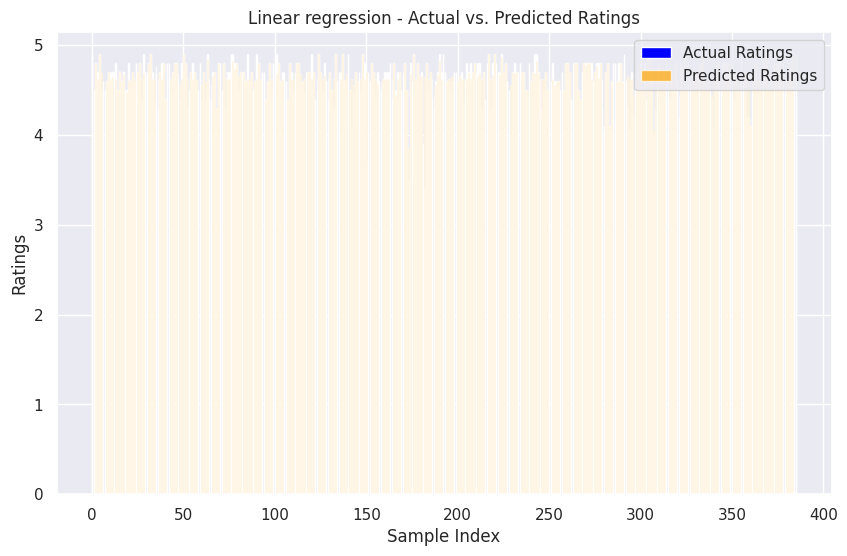

In [160]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assume 'df' is your DataFrame with the dataset

df = df
# Convert the non-numeric values to NaN in the 'ratings' column
df['ratings'] = pd.to_numeric(df['ratings'], errors='coerce')

# Separate features (X) and target variable (y)
X = df.drop('ratings', axis=1)
y = df['ratings']

# Identify categorical columns for one-hot encoding
categorical_columns = ['title', 'genre', 'author', 'reviews']

# One-hot encode categorical columns
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Visualize actual vs. predicted ratings
plt.scatter(y_test, predictions)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs. Predicted Ratings')
plt.show()

# Visualize actual vs. predicted ratings using a bar graph
plt.figure(figsize=(10, 6))
indices = range(len(y_test))
plt.bar(indices, y_test, width=0.4, label='Actual Ratings', color='blue')
plt.bar(indices, predictions, width=0.4, label='Predicted Ratings', color='orange', alpha=0.7)
plt.xlabel('Sample Index')
plt.ylabel('Ratings')
plt.title('Linear regression - Actual vs. Predicted Ratings')
plt.legend()
plt.show()

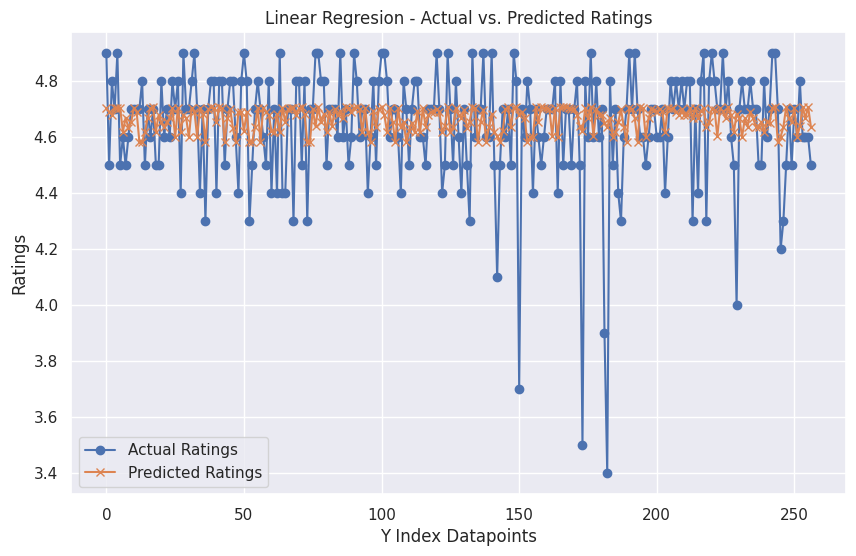

In [ ]:
# Create a line plot between actual and predicted ratings
plt.figure(figsize=(10, 6))
plt.plot(y_test.reset_index(drop=True), label='Actual Ratings', marker='o')
plt.plot(predictions, label='Predicted Ratings', marker='x')
plt.xlabel('Y Index Datapoints')
plt.ylabel('Ratings')
plt.title('Linear Regresion - Actual vs. Predicted Ratings')
plt.legend()
plt.show()

In [ ]:
df

,Unnamed: 0,price,ranks,title,no_of_reviews,ratings,author,cover_type,year,genre
0,0,12.49,1.0,The Lost Symbol,"16,118",4.4,Dan Brown,Hardcover,2009,Fiction
1,1,13.40,2.0,The Shack: Where Tragedy Confronts Eternity,"23,392",4.7,William P. Young,Paperback,2009,Fiction
2,2,9.93,3.0,Liberty and Tyranny: A Conservative Manifesto,"5,036",4.8,Mark R. Levin,Hardcover,2009,Non Fiction
3,3,14.30,4.0,"Breaking Dawn (The Twilight Saga, Book 4)","16,912",4.7,Stephenie Meyer,Hardcover,2009,Fiction
4,4,9.99,5.0,Going Rogue: An American Life,"1,572",4.6,Sarah Palin,Hardcover,2009,Non Fiction
...,...,...,...,...,...,...,...,...,...,...
1286,1286,16.69,96.0,Will,"21,401",4.8,Will Smith,Hardcover,2021,Non Fiction
1287,1287,7.49,97.0,Think and Grow Rich: The Landmark Bestseller N...,"79,872",4.7,Napoleon Hill,Paperback,2021,Non Fiction
1288,1288,8.95,98.0,Dragons Love Tacos,"15,753",4.8,Adam Rubin,Hardcover,2021,Fiction
1289,1289,7.59,99.0,The Truth About COVID-19: Exposing The Great R...,"7,246",4.8,Doctor Joseph Mercola,Hardcover,2021,Non Fiction


SVR - Mean Squared Error: 0.040972275782209036


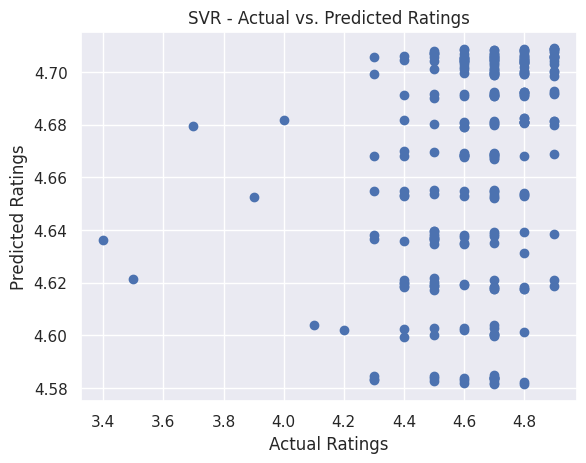

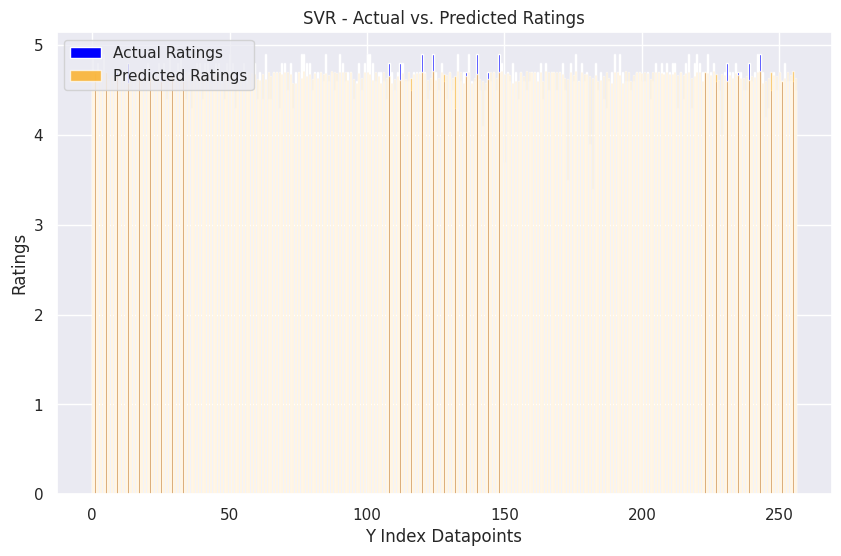

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Support Vector Machine for Regression (SVR) model
model = SVR()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'SVR - Mean Squared Error: {mse}')

# Visualize actual vs. predicted ratings
plt.scatter(y_test, predictions)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('SVR - Actual vs. Predicted Ratings')
plt.show()


# Visualize actual vs. predicted ratings using a bar graph
plt.figure(figsize=(10, 6))
indices = range(len(y_test))
plt.bar(indices, y_test, width=0.4, label='Actual Ratings', color='blue')
plt.bar(indices, predictions, width=0.4, label='Predicted Ratings', color='orange', alpha=0.7)
plt.xlabel('Sample Index')
plt.ylabel('Ratings')
plt.title('SVR - Actual vs. Predicted Ratings')
plt.legend()
plt.show()

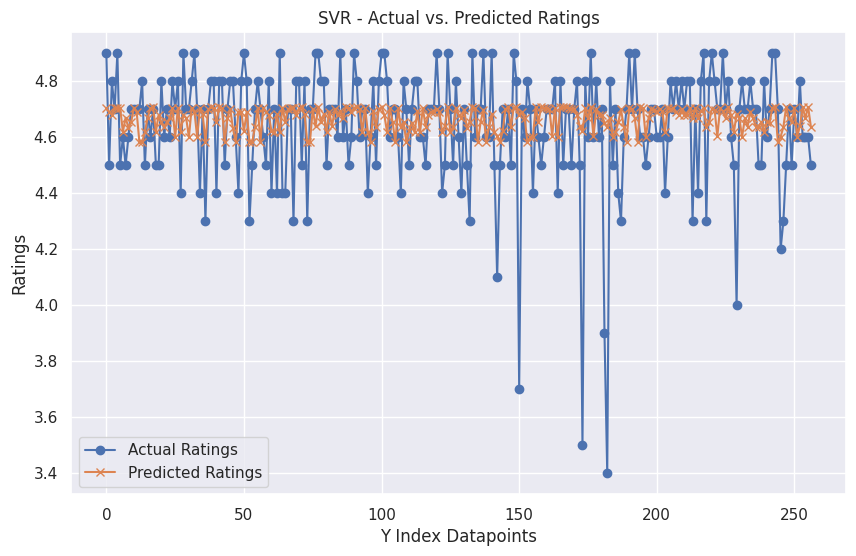

In [ ]:
# Create a line plot between actual and predicted ratings
plt.figure(figsize=(10, 6))
plt.plot(y_test.reset_index(drop=True), label='Actual Ratings', marker='o')
plt.plot(predictions, label='Predicted Ratings', marker='x')
plt.xlabel('Y Index Datapoints')
plt.ylabel('Ratings')
plt.title('SVR - Actual vs. Predicted Ratings')
plt.legend()
plt.show()

# Results


**Linear Regression:**
* MSE:  0.02313208051059806

**Support Vector Machine for Regression(SVR)**
* MSE:  0.040972275782209036


Base on the results Linear Regression perfroms better as compared to SVR however there is room for growth

# Insights

1.   Likelihood of Best-Seller Status:
Our SVR and linear regression models to predict book sales ratings amounts the top 100 sales based on various features such as author, genre and price,to helping authors and publishers understand what contributes to a book's success.

2.   Common Traits of Top-Selling Books:
Through our EDA we have established that moderate price, good reviews and non-fiction books are among the common traits of top-selling books.

3.   Genre Attractiveness:
From our dataset it the understanding of our dataset through modeling and EDA it doe not matter that significantly if the book genre is fiction or non-fiction, although our dataset is skewed towards non-fiction


### Future Work
Test our model more with new and varying type of input and increase the size and variety of dataset like add more lanugaes or genre etc.